In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_style("whitegrid")

In [7]:
def generate_char(df, title):
    df["total tuples"] = 2000000
    df["Tuples per second"] = df["total tuples"].div(df["Running Time (ms)"].values)
    df["Tuples per second"] = df["Tuples per second"].apply(lambda x: x*1000)
    df_viz = df.drop(columns=["Running Time (ms)", "total tuples"]).groupby(["Threads", "Hash_Bits"]).mean()
    
    fig, ax = plt.subplots(figsize=(15, 6))
    sb.lineplot(data=df_viz, x="Hash_Bits", y="Tuples per second", hue="Threads", marker="o", ax=ax).set(title=title)

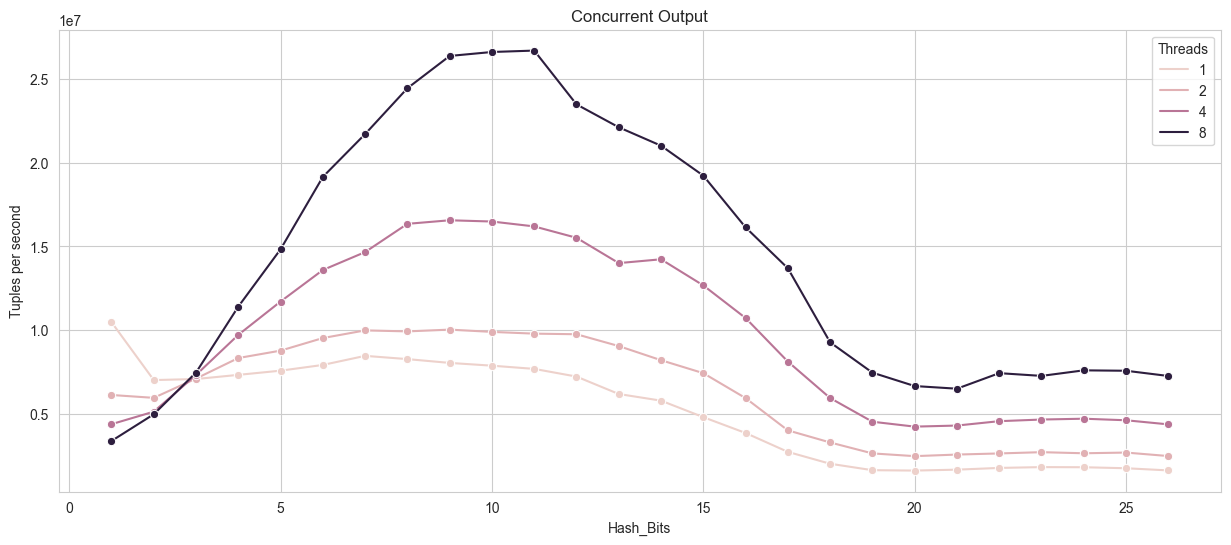

In [8]:
concurrect_df = pd.concat([pd.read_csv(f"../experiments/concurrent_output/experiment_{x}.csv", sep=";") for x in range(1,9)]).reset_index(drop=True)
generate_char(concurrect_df, "Concurrent Output")

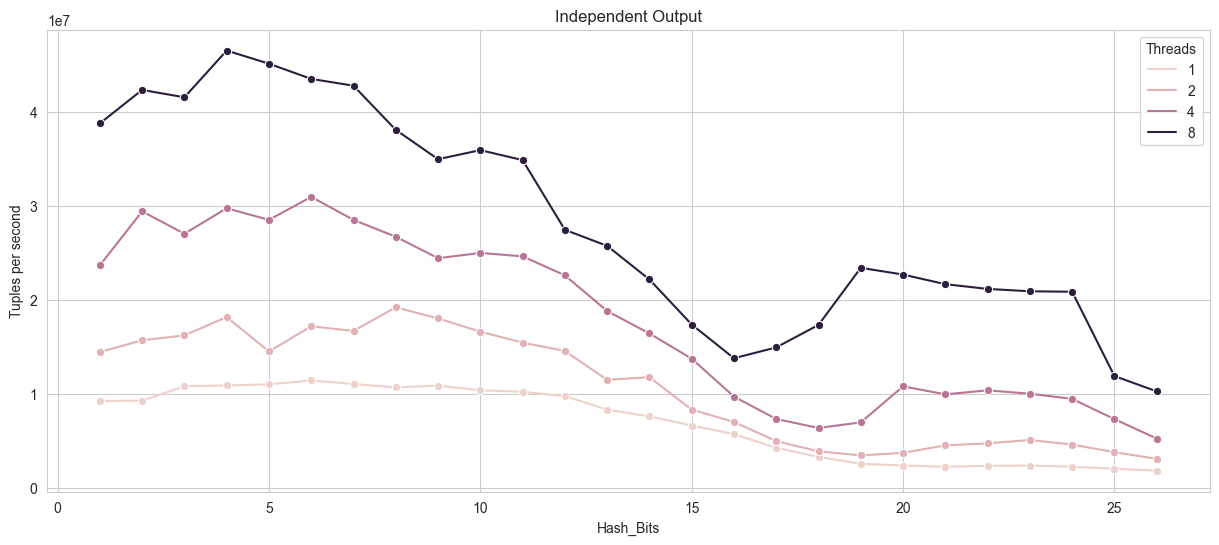

In [9]:
ind_df = pd.concat([pd.read_csv(f"../experiments/independent_output/experiment_{x}.csv", sep=";") for x in range(1,9)]).reset_index(drop=True)
generate_char(ind_df, "Independent Output")